### **`Business Understanding`**

**Objective**: The primary objective of this project is to predict fluctuations in the U.S. Dollar Index (DXY) using historical prices of Bitcoin, crude oil, and gold, alongside other influential factors such as economic trends and temporal variables. Additionally, the project aims to utilize these predictions to calculate and assess portfolio risk, providing actionable insights for more informed investment strategies.

**Key Questions:**
1. What are the relationships between Bitcoin, crude oil, and gold prices, and how do they correlate with changes in the U.S. Dollar Index?
2.	To what extent do external features, such as holidays, weekdays, or the DXY itself, influence the accuracy and predictive power of the model?
3.	How can the predictive model be used to calculate and evaluate portfolio risk, helping investors optimize their asset allocation?
4.	What actionable insights can the predictive model offer for market forecasting and portfolio management strategies?


### **`Data Understanding`**

#### **Importation of Packages**

In [115]:
# Descriptive Analytics Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math

# Time Series Analysis Packages
from statsmodels.tsa.seasonal import seasonal_decompose

# Machine Learning Packages
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, PowerTransformer, LabelEncoder, label_binarize
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#Utilities & Model Persistance
import warnings
import joblib

sns.set_style('darkgrid')
warnings.filterwarnings("ignore",)

In [116]:
df = pd.read_csv('../datasets/final_dataset.csv')
df

,Unnamed: 0,Date,DoW,Month,Year,btc_open,btc_high,btc_low,btc_close,oil_close,...,gold_open,gold_high,gold_low,dxy_close,dxy_open,dxy_high,dxy_low,IS_HOLIDAY,IS_WEEKDAY,Title
0,3652,2024-10-31,Thursday,10,2024,NaN,NaN,NaN,NaN,69.26,...,"2,799.10","2,801.20","2,741.80",103.98,104.08,104.22,103.82,0.0,1,NaN
1,3651,2024-10-30,Wednesday,10,2024,NaN,NaN,NaN,NaN,68.61,...,"2,786.90","2,801.80","2,782.40",103.99,104.25,104.44,103.98,0.0,1,NaN
2,3650,2024-10-29,Tuesday,10,2024,NaN,NaN,NaN,NaN,67.21,...,"2,741.90","2,773.20","2,741.90",104.32,104.31,104.64,104.21,0.0,1,NaN
3,3649,2024-10-28,Monday,10,2024,NaN,NaN,NaN,NaN,67.38,...,"2,749.20","2,758.30","2,736.90",104.32,104.32,104.57,104.12,0.0,1,NaN
4,3648,2024-10-27,Sunday,10,2024,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,4,2014-11-05,Wednesday,11,2014,330.68,343.37,330.68,339.49,78.68,...,"1,168.40","1,169.30","1,137.10",87.44,87.01,87.61,86.94,0.0,1,NaN
3649,3,2014-11-04,Tuesday,11,2014,327.16,331.77,325.08,330.49,77.19,...,"1,164.60","1,175.00","1,163.40",86.98,87.25,87.30,86.88,0.0,1,NaN
3650,2,2014-11-03,Monday,11,2014,325.57,334.00,325.48,327.55,78.78,...,"1,171.10","1,173.40","1,161.00",87.31,87.08,87.41,87.02,0.0,1,NaN
3651,1,2014-11-02,Sunday,11,2014,326.08,329.05,320.63,325.89,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN


#### **Exploratory Data Analysis**

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3653 non-null   int64  
 1   Date        3653 non-null   object 
 2   DoW         3653 non-null   object 
 3   Month       3653 non-null   int64  
 4   Year        3653 non-null   int64  
 5   btc_open    3643 non-null   float64
 6   btc_high    3643 non-null   float64
 7   btc_low     3643 non-null   float64
 8   btc_close   3643 non-null   float64
 9   oil_close   2637 non-null   float64
 10  oil_open    2637 non-null   float64
 11  oil_high    2637 non-null   float64
 12  oil_low     2637 non-null   float64
 13  gold_close  2564 non-null   object 
 14  gold_open   2564 non-null   object 
 15  gold_high   2564 non-null   object 
 16  gold_low    2564 non-null   object 
 17  dxy_close   2610 non-null   float64
 18  dxy_open    2610 non-null   float64
 19  dxy_high    2610 non-null  

In [118]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,3653.0,1826.000000,1054.674594,0.00,913.0000,1826.000,2739.0000,3652.00
Month,3653.0,6.522310,3.449345,1.00,4.0000,7.000,10.0000,12.00
Year,3653.0,2019.333425,2.897193,2014.00,2017.0000,2019.000,2022.0000,2024.00
btc_open,3643.0,18449.732976,20039.914540,176.90,1319.8550,9314.130,29848.5850,73079.38
btc_high,3643.0,18865.656794,20480.738577,211.73,1339.5950,9466.350,30391.1100,73750.07
btc_low,3643.0,18008.726780,19563.811246,171.51,1315.0650,9149.390,29307.6250,71334.09
btc_close,3643.0,18467.017137,20052.330675,178.10,1334.8400,9316.630,29859.7400,73083.50
oil_close,2637.0,61.870300,17.522667,11.57,48.7000,59.640,74.1300,119.78
oil_open,2637.0,61.894638,17.514253,18.01,48.7900,59.650,74.1800,120.66
oil_high,2637.0,62.903367,17.769240,19.66,49.4600,60.500,75.3100,126.42


#### **Data Cleaning**

In [119]:
df.drop(columns='Unnamed: 0', inplace=True)

In [120]:
df.isna().sum()

Date             0
DoW              0
Month            0
Year             0
btc_open        10
btc_high        10
btc_low         10
btc_close       10
oil_close     1016
oil_open      1016
oil_high      1016
oil_low       1016
gold_close    1089
gold_open     1089
gold_high     1089
gold_low      1089
dxy_close     1043
dxy_open      1043
dxy_high      1043
dxy_low       1043
IS_HOLIDAY       0
IS_WEEKDAY       0
Title         3549
dtype: int64

In [121]:
df['Date'] = pd.to_datetime(df['Date'])

In [122]:
df['Date'].min(), df['Date'].max()

(Timestamp('2014-11-01 00:00:00'), Timestamp('2024-10-31 00:00:00'))

In [123]:
numeric_columns = ['gold_open', 'gold_high', 'gold_low', 'gold_close'] 
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')


##### **Rearranging columns for easier analysis**

In [124]:
df.columns

Index(['Date', 'DoW', 'Month', 'Year', 'btc_open', 'btc_high', 'btc_low',
       'btc_close', 'oil_close', 'oil_open', 'oil_high', 'oil_low',
       'gold_close', 'gold_open', 'gold_high', 'gold_low', 'dxy_close',
       'dxy_open', 'dxy_high', 'dxy_low', 'IS_HOLIDAY', 'IS_WEEKDAY', 'Title'],
      dtype='object')

In [125]:
new_column_order = ['Date', 'DoW', 'Month', 'Year', 
                    'btc_open', 'btc_high', 'btc_low','btc_close',
                    'oil_open', 'oil_high', 'oil_low', 'oil_close', 
                    'gold_open', 'gold_high', 'gold_low', 'gold_close',
                    'dxy_open', 'dxy_high', 'dxy_low', 'dxy_close', 
                    'IS_HOLIDAY', 'IS_WEEKDAY', 'Title']

df = df[new_column_order]

In [126]:
df.rename(columns={'Title': 'Holiday_Name'}, inplace=True)

In [127]:
df

,Date,DoW,Month,Year,btc_open,btc_high,btc_low,btc_close,oil_open,oil_high,...,gold_high,gold_low,gold_close,dxy_open,dxy_high,dxy_low,dxy_close,IS_HOLIDAY,IS_WEEKDAY,Holiday_Name
0,2024-10-31,Thursday,10,2024,NaN,NaN,NaN,NaN,69.10,70.81,...,2801.2,2741.8,2749.3,104.08,104.22,103.82,103.98,0.0,1,NaN
1,2024-10-30,Wednesday,10,2024,NaN,NaN,NaN,NaN,67.47,69.17,...,2801.8,2782.4,2800.8,104.25,104.44,103.98,103.99,0.0,1,NaN
2,2024-10-29,Tuesday,10,2024,NaN,NaN,NaN,NaN,68.02,68.52,...,2773.2,2741.9,2768.8,104.31,104.64,104.21,104.32,0.0,1,NaN
3,2024-10-28,Monday,10,2024,NaN,NaN,NaN,NaN,68.98,69.00,...,2758.3,2736.9,2755.9,104.32,104.57,104.12,104.32,0.0,1,NaN
4,2024-10-27,Sunday,10,2024,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,2014-11-05,Wednesday,11,2014,330.68,343.37,330.68,339.49,77.36,79.35,...,1169.3,1137.1,1145.7,87.01,87.61,86.94,87.44,0.0,1,NaN
3649,2014-11-04,Tuesday,11,2014,327.16,331.77,325.08,330.49,78.22,78.41,...,1175.0,1163.4,1167.7,87.25,87.30,86.88,86.98,0.0,1,NaN
3650,2014-11-03,Monday,11,2014,325.57,334.00,325.48,327.55,80.59,80.98,...,1173.4,1161.0,1169.8,87.08,87.41,87.02,87.31,0.0,1,NaN
3651,2014-11-02,Sunday,11,2014,326.08,329.05,320.63,325.89,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN


#### **Distribution Analysis**

[]

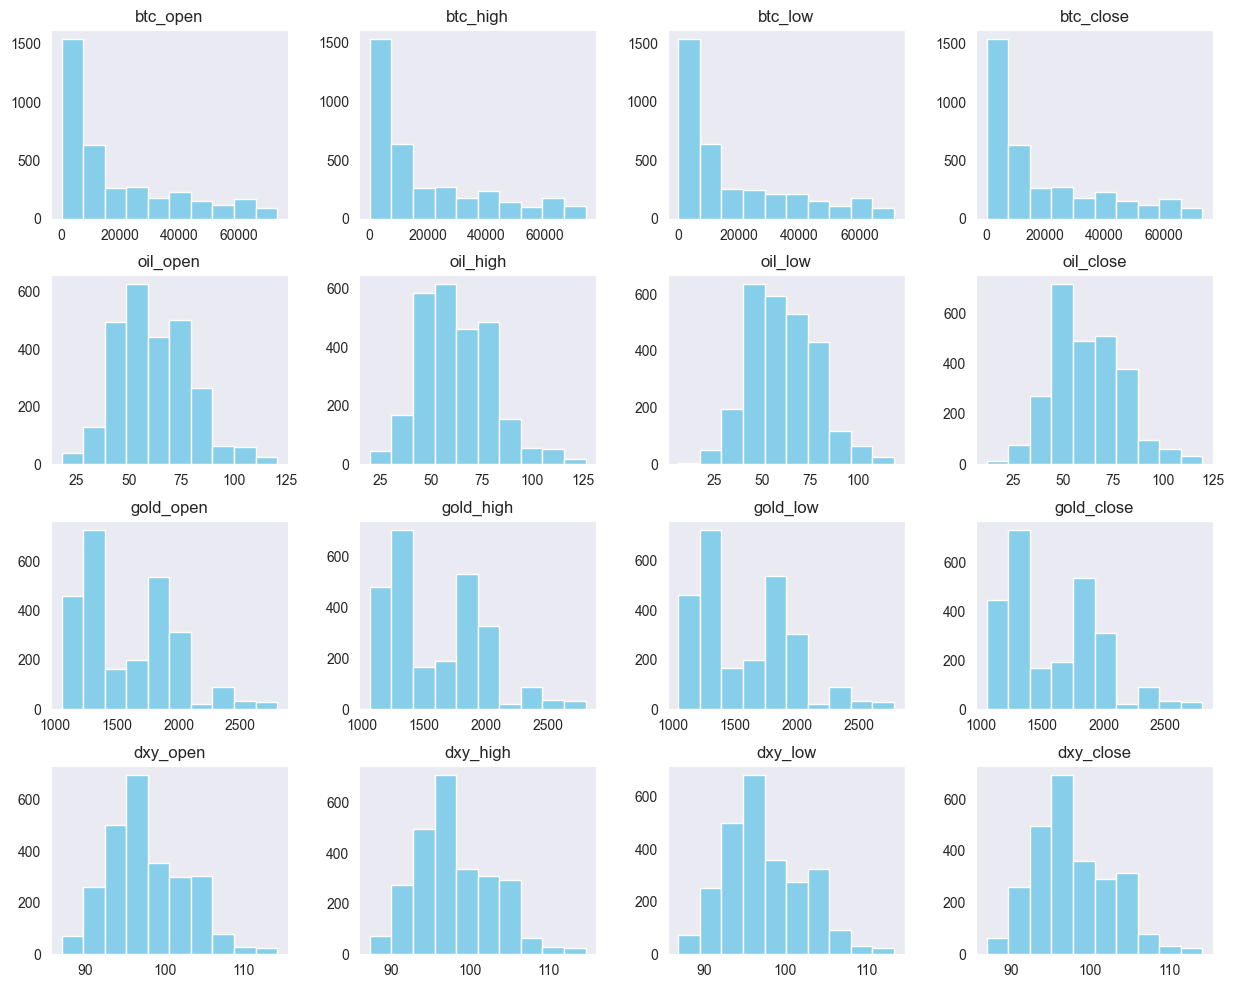

In [128]:
df.drop(columns=['Date', 'Month', 'Year', 'IS_HOLIDAY', 'IS_WEEKDAY']).hist(grid=False, color='skyblue', figsize=(15, 12) )
plt.plot()

#### **Correlation Analysis**

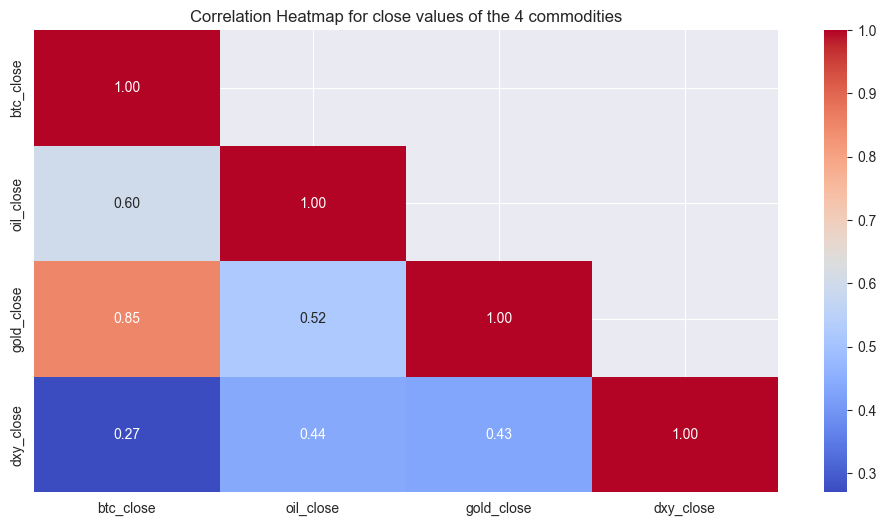

In [129]:
correlation_matrix = df[['btc_close', 'oil_close', 'gold_close', 'dxy_close']].corr().round(2)

# Modify the mask to exclude the diagonal
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# Plot the heatmap with the modified mask to include the diagonal
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap for close values of the 4 commodities")
plt.show()

#### **Time Series Analysis**

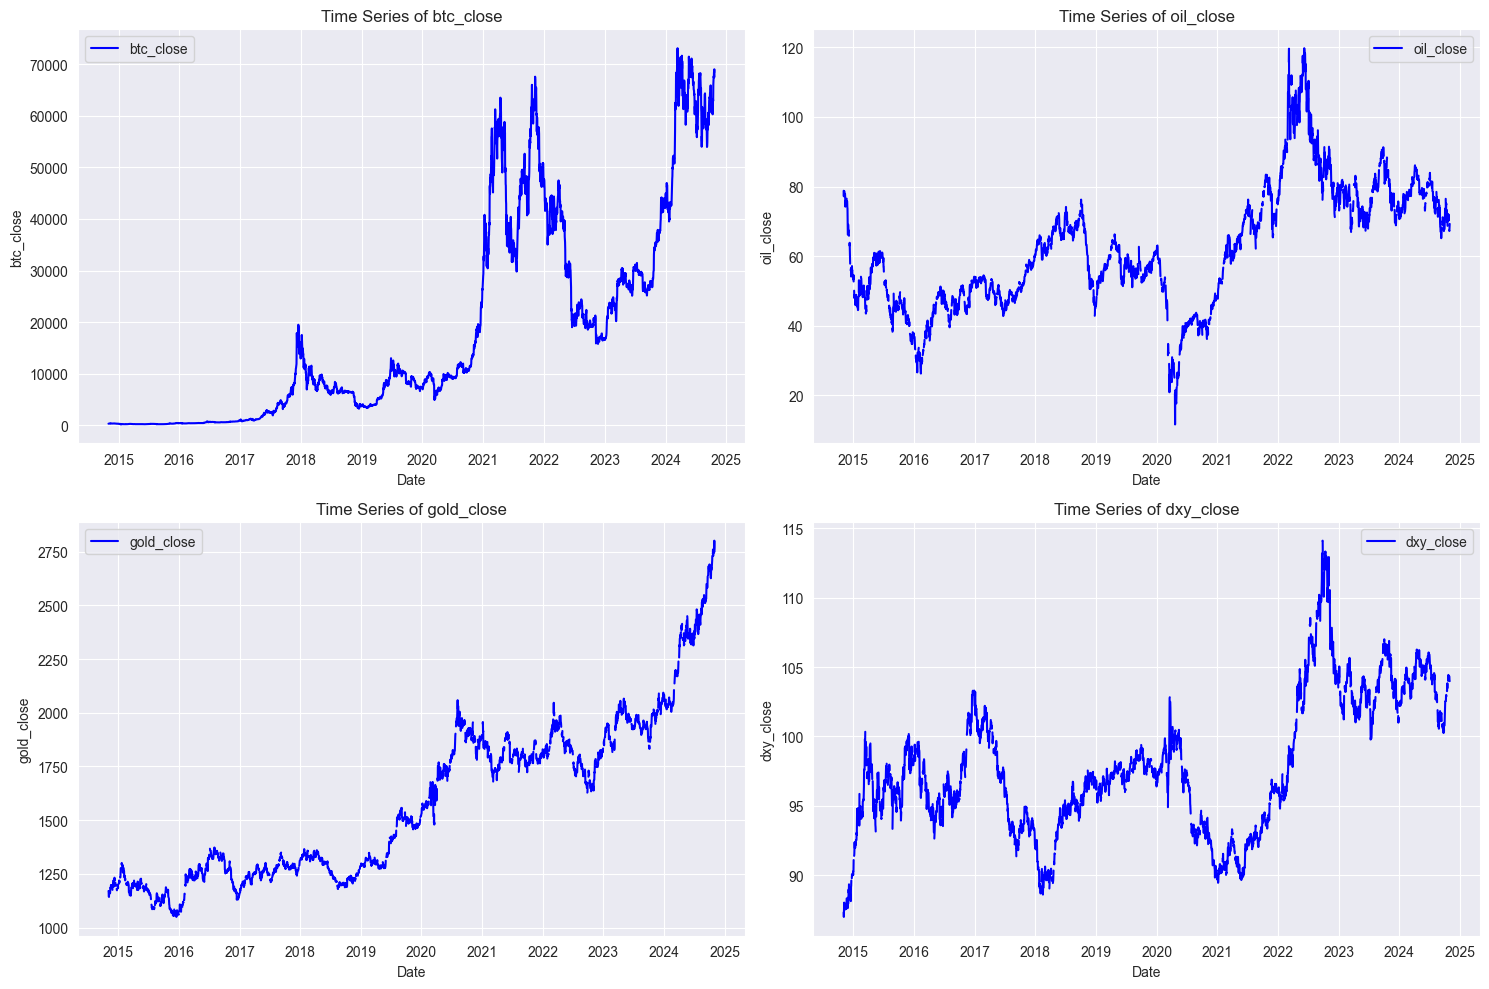

In [130]:
# Set Date as the index for time series analysis
df.set_index('Date', inplace=True)

# Ensure the dataset is sorted by date in ascending order
df = df.sort_index(ascending=True)


# List of variables to analyze
variables = ['btc_close', 'oil_close', 'gold_close', 'dxy_close']

# Plot time series of each variable
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables):
    plt.subplot(2, 2, i+1)
    plt.plot(df[var], label=var, color='blue')
    plt.title(f"Time Series of {var}")
    plt.xlabel("Date")
    plt.ylabel(var)
    plt.legend()

plt.tight_layout()
plt.show()

##### **Addictive Decomposition**

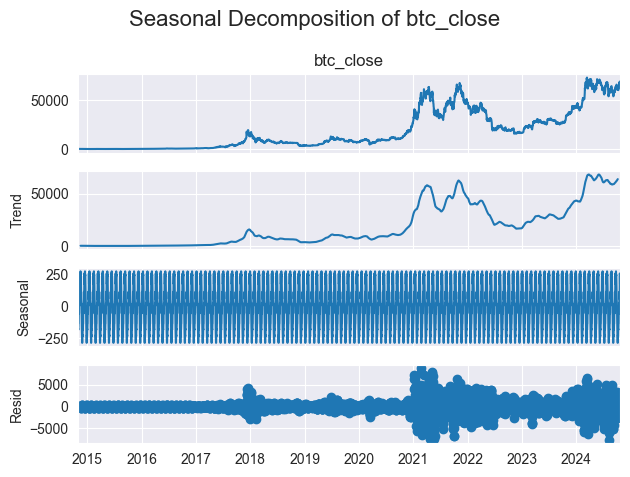

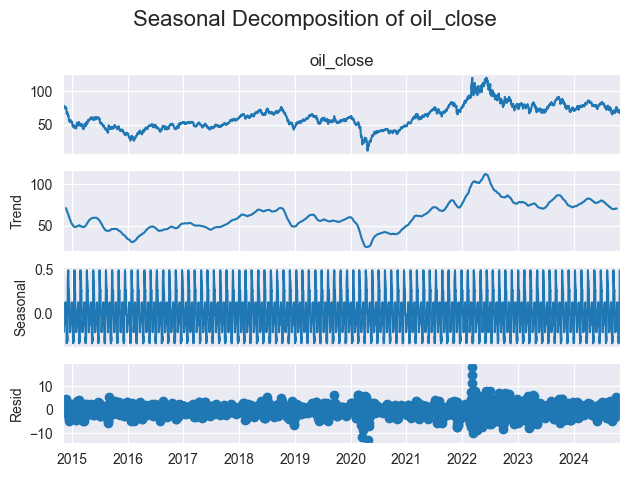

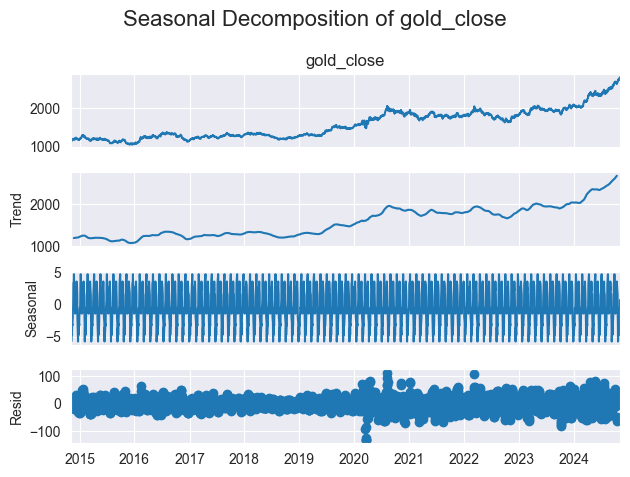

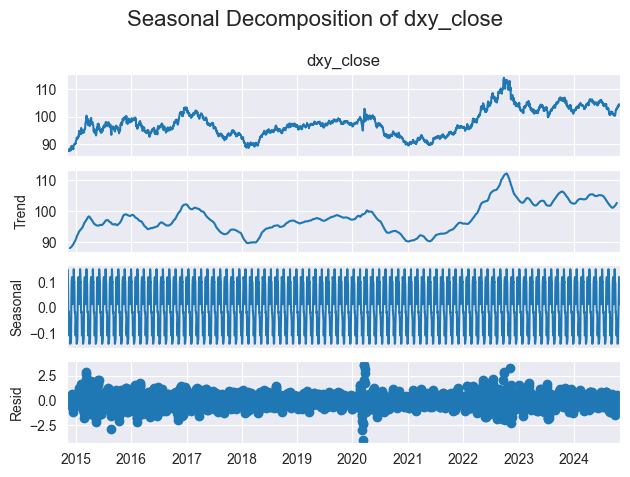

In [131]:
for variable in variables:
    decomposition = seasonal_decompose(df[variable].dropna(), model='additive', period=30)
    fig = decomposition.plot()
    fig.suptitle("") 
    plt.subplots_adjust(top=0.85) 
    plt.gcf().text(0.5, 0.95, f"Seasonal Decomposition of {variable}", fontsize=16, ha='center') 
    plt.show()

##### **Multiplicative Decomposition**

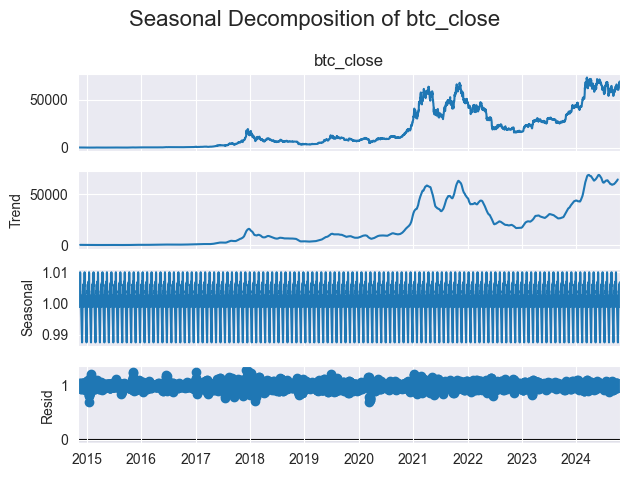

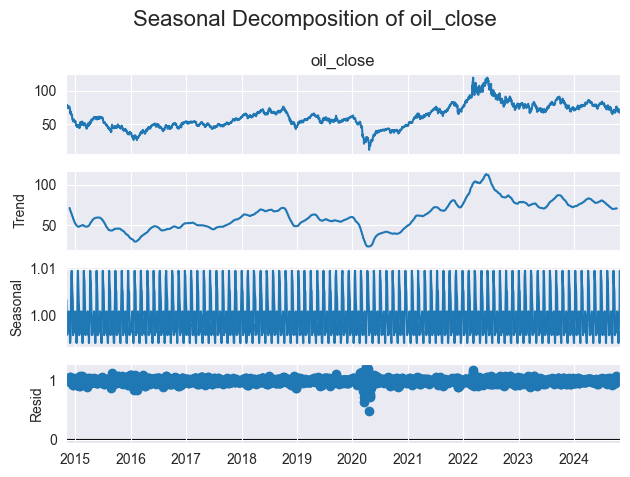

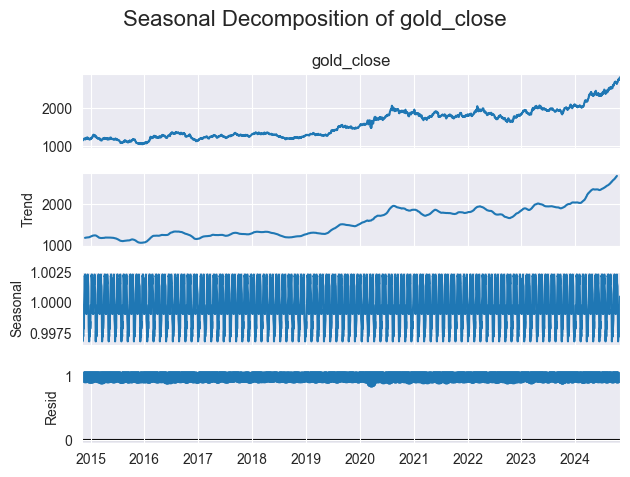

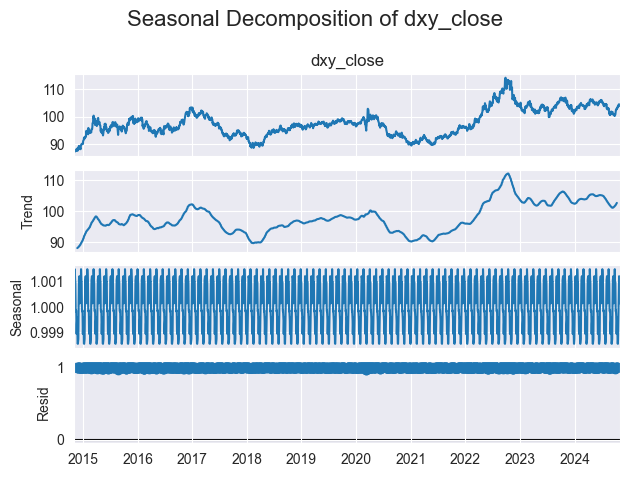

In [132]:
for variable in variables:
    decomposition = seasonal_decompose(df[variable].dropna(), model='multiplicative', period=30)
    fig = decomposition.plot()
    fig.suptitle("") 
    plt.subplots_adjust(top=0.85)  
    plt.gcf().text(0.5, 0.95, f"Seasonal Decomposition of {variable}", fontsize=16, ha='center')  
    plt.show()

#### **Outlier Analysis**

Text(0.5, 1.0, 'Outlier Analysis for Oil and Dollar Index')

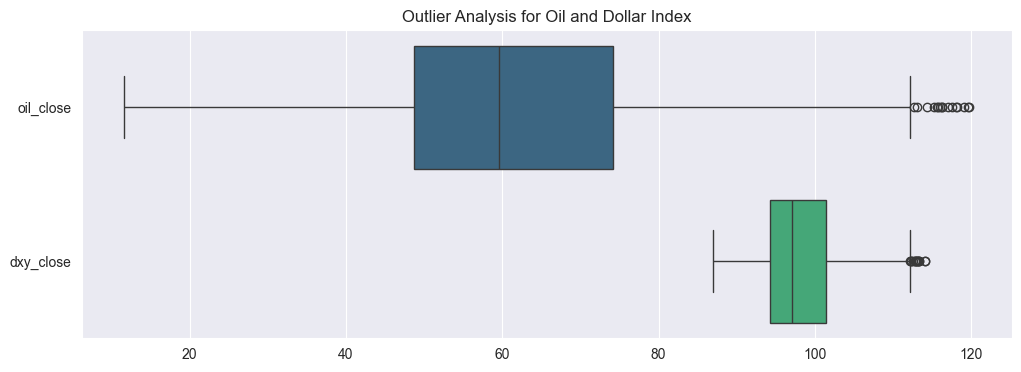

In [133]:
plt.figure(figsize=(12, 4))
sns.boxplot(df[['oil_close', 'dxy_close']], orient='h', palette='viridis')
plt.title('Outlier Analysis for Oil and Dollar Index')

[]

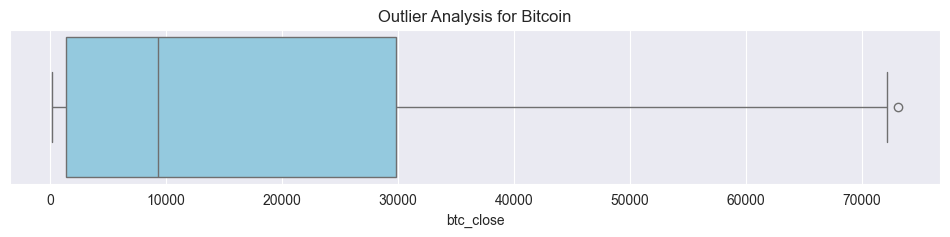

In [134]:
plt.figure(figsize=(12, 2))
sns.boxplot(df['btc_close'], orient='h', color='skyblue' )
plt.title('Outlier Analysis for Bitcoin')
plt.plot()

[]

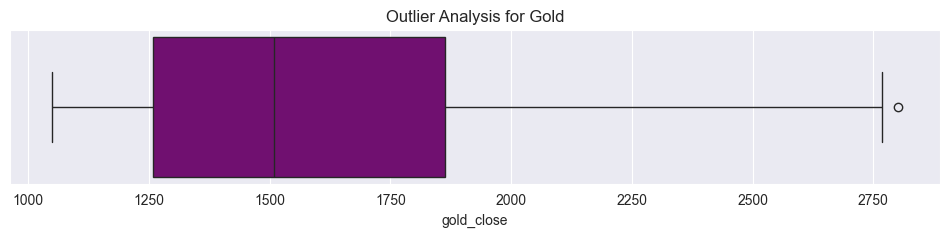

In [135]:
plt.figure(figsize=(12, 2))
sns.boxplot(df['gold_close'], orient='h', color='purple' )
plt.title('Outlier Analysis for Gold')
plt.plot()

### **`Data Preparation`**

##### **Imputation missing values using Linear Interpolation and Backward fill**

In [136]:
df.isna().sum()

DoW                0
Month              0
Year               0
btc_open          10
btc_high          10
btc_low           10
btc_close         10
oil_open        1016
oil_high        1016
oil_low         1016
oil_close       1016
gold_open       1089
gold_high       1089
gold_low        1089
gold_close      1089
dxy_open        1043
dxy_high        1043
dxy_low         1043
dxy_close       1043
IS_HOLIDAY         0
IS_WEEKDAY         0
Holiday_Name    3549
dtype: int64

In [137]:
# Imputing missing values in the oil, gold, and dollar data with interpolation
cols = ['btc_open', 'btc_high', 'btc_low', 'btc_close',
        'oil_open', 'oil_high', 'oil_low', 'oil_close',
         'gold_open', 'gold_high', 'gold_low', 'gold_close',
        'dxy_close', 'dxy_open', 'dxy_high', 'dxy_low']

df[cols] = df[cols].interpolate(method='linear', axis=0)

In [138]:
df.head()

,DoW,Month,Year,btc_open,btc_high,btc_low,btc_close,oil_open,oil_high,oil_low,...,gold_high,gold_low,gold_close,dxy_open,dxy_high,dxy_low,dxy_close,IS_HOLIDAY,IS_WEEKDAY,Holiday_Name
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-01,Saturday,11,2014,338.65,340.53,321.05,325.75,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN
2014-11-02,Sunday,11,2014,326.08,329.05,320.63,325.89,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN
2014-11-03,Monday,11,2014,325.57,334.00,325.48,327.55,80.59,80.98,78.08,...,1173.4,1161.0,1169.8,87.08,87.41,87.02,87.31,0.0,1,NaN
2014-11-04,Tuesday,11,2014,327.16,331.77,325.08,330.49,78.22,78.41,75.84,...,1175.0,1163.4,1167.7,87.25,87.30,86.88,86.98,0.0,1,NaN
2014-11-05,Wednesday,11,2014,330.68,343.37,330.68,339.49,77.36,79.35,76.46,...,1169.3,1137.1,1145.7,87.01,87.61,86.94,87.44,0.0,1,NaN


In [139]:
# remaining null values are due to interpolation not having values for the first 2 days when calculated
df.isna().sum()

DoW                0
Month              0
Year               0
btc_open           0
btc_high           0
btc_low            0
btc_close          0
oil_open           2
oil_high           2
oil_low            2
oil_close          2
gold_open          2
gold_high          2
gold_low           2
gold_close         2
dxy_open           2
dxy_high           2
dxy_low            2
dxy_close          2
IS_HOLIDAY         0
IS_WEEKDAY         0
Holiday_Name    3549
dtype: int64

In [140]:
df.head()

,DoW,Month,Year,btc_open,btc_high,btc_low,btc_close,oil_open,oil_high,oil_low,...,gold_high,gold_low,gold_close,dxy_open,dxy_high,dxy_low,dxy_close,IS_HOLIDAY,IS_WEEKDAY,Holiday_Name
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-01,Saturday,11,2014,338.65,340.53,321.05,325.75,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN
2014-11-02,Sunday,11,2014,326.08,329.05,320.63,325.89,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN
2014-11-03,Monday,11,2014,325.57,334.00,325.48,327.55,80.59,80.98,78.08,...,1173.4,1161.0,1169.8,87.08,87.41,87.02,87.31,0.0,1,NaN
2014-11-04,Tuesday,11,2014,327.16,331.77,325.08,330.49,78.22,78.41,75.84,...,1175.0,1163.4,1167.7,87.25,87.30,86.88,86.98,0.0,1,NaN
2014-11-05,Wednesday,11,2014,330.68,343.37,330.68,339.49,77.36,79.35,76.46,...,1169.3,1137.1,1145.7,87.01,87.61,86.94,87.44,0.0,1,NaN


In [141]:
df.columns

Index(['DoW', 'Month', 'Year', 'btc_open', 'btc_high', 'btc_low', 'btc_close',
       'oil_open', 'oil_high', 'oil_low', 'oil_close', 'gold_open',
       'gold_high', 'gold_low', 'gold_close', 'dxy_open', 'dxy_high',
       'dxy_low', 'dxy_close', 'IS_HOLIDAY', 'IS_WEEKDAY', 'Holiday_Name'],
      dtype='object')

#### **Feature Engineering**
To standardize the commodities since they are on different scales especially Bitcoin, we:

1. Create weekly and monthly moving averages
2. Create percentage change for all 4 commoditiies
3. Calculate intradday volatility
4. Calculate rolling averages for 

In [142]:
def apply_feature_engineering(df):
    """
    Apply feature engineering directly to the given DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame containing price columns.

    Returns:
    - pd.DataFrame: Transformed DataFrame with new engineered features.
    """
    # Define the columns for each asset
    assets = {
        'btc': ['btc_open', 'btc_close', 'btc_high', 'btc_low'],
        'oil': ['oil_open', 'oil_close', 'oil_high', 'oil_low'],
        'gold': ['gold_open', 'gold_close', 'gold_high', 'gold_low'],
        'dxy': ['dxy_open', 'dxy_close', 'dxy_high', 'dxy_low']
    }
    
    # Define the price columns for running averages
    price_cols = ['btc_open', 'btc_close', 'oil_open', 'oil_close', 'gold_open', 'gold_close', 'dxy_open', 'dxy_close']

    # Calculate running weekly and monthly averages
    for col in price_cols:
        df[f'{col}_weekly_avg'] = df[col].rolling(window=7, min_periods=1).mean()
        df[f'{col}_monthly_avg'] = df[col].rolling(window=30, min_periods=1).mean()
    
    # Calculate daily percentage changes
    for asset, cols in assets.items():
        open_col, close_col, high_col, low_col = cols
        df[f'{asset}_daily_percentage'] = ((df[close_col] - df[open_col]) / df[open_col]) * 100
        df[f'{asset}_daily_max_percentage'] = ((df[high_col] - df[open_col]) / df[open_col]) * 100
        df[f'{asset}_daily_min_percentage'] = ((df[low_col] - df[open_col]) / df[open_col]) * 100
    
    # Calculate intraday volatility
    for asset in assets.keys():
        df[f'{asset}_intraday_volatility'] = ((df[f'{asset}_high'] - df[f'{asset}_low']) / df[f'{asset}_open']) * 100
    
    # Calculate rolling volatility of daily percentage changes
    for asset in assets.keys():
        # Daily percentage change
        df[f'{asset}_daily_pct_change'] = df[f'{asset}_close'].pct_change() * 100
        
        # Rolling volatility (standard deviation of daily percentage changes)
        df[f'{asset}_rolling_volatility_7'] = df[f'{asset}_daily_pct_change'].rolling(window=7).std()
        df[f'{asset}_rolling_volatility_30'] = df[f'{asset}_daily_pct_change'].rolling(window=30).std()

    return df

In [ ]:
apply_feature_engineering(df)

,DoW,Month,Year,btc_open,btc_high,btc_low,btc_close,oil_open,oil_high,oil_low,...,btc_rolling_volatility_30,oil_daily_pct_change,oil_rolling_volatility_7,oil_rolling_volatility_30,gold_daily_pct_change,gold_rolling_volatility_7,gold_rolling_volatility_30,dxy_daily_pct_change,dxy_rolling_volatility_7,dxy_rolling_volatility_30
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-01,Saturday,11,2014,338.65,340.53,321.05,325.75,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-02,Sunday,11,2014,326.08,329.05,320.63,325.89,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-03,Monday,11,2014,325.57,334.00,325.48,327.55,80.59,80.980000,78.080000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-04,Tuesday,11,2014,327.16,331.77,325.08,330.49,78.22,78.410000,75.840000,...,NaN,-2.018279,NaN,NaN,-0.179518,NaN,NaN,-0.377964,NaN,NaN
2014-11-05,Wednesday,11,2014,330.68,343.37,330.68,339.49,77.36,79.350000,76.460000,...,NaN,1.930302,NaN,NaN,-1.884046,NaN,NaN,0.528857,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-27,Sunday,10,2024,69009.37,69408.10,66873.84,67525.97,69.43,69.973333,67.933333,...,1.786862,-2.085901,2.103183,2.049756,0.166256,0.630561,0.576807,0.019179,0.216091,0.199731
2024-10-28,Monday,10,2024,69009.37,69408.10,66873.84,67525.97,68.98,69.000000,66.920000,...,1.786936,-2.130338,2.191355,2.089053,0.165980,0.631339,0.575492,0.019175,0.211509,0.200711
2024-10-29,Tuesday,10,2024,69009.37,69408.10,66873.84,67525.97,68.02,68.520000,66.720000,...,1.784753,-0.252300,1.606657,2.089559,0.468087,0.587239,0.577452,0.000000,0.211734,0.201975


In [144]:
# Add the Movement column as the y-target

# df['Movement'] = df['dxy_daily_pct_change'].apply(lambda x: 'Positive' if x > 0 else 'Negative')
df['Movement'] = df['dxy_daily_pct_change'].apply(lambda x: 'Positive' if x > 0.07 else ('Negative' if x < -0.07 else 'Stable'))

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3653 entries, 2014-11-01 to 2024-10-31
Data columns (total 67 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DoW                         3653 non-null   object 
 1   Month                       3653 non-null   int64  
 2   Year                        3653 non-null   int64  
 3   btc_open                    3653 non-null   float64
 4   btc_high                    3653 non-null   float64
 5   btc_low                     3653 non-null   float64
 6   btc_close                   3653 non-null   float64
 7   oil_open                    3651 non-null   float64
 8   oil_high                    3651 non-null   float64
 9   oil_low                     3651 non-null   float64
 10  oil_close                   3651 non-null   float64
 11  gold_open                   3651 non-null   float64
 12  gold_high                   3651 non-null   float64
 13  gold_low       

In [146]:
df.isnull().sum()

DoW                            0
Month                          0
Year                           0
btc_open                       0
btc_high                       0
                              ..
gold_rolling_volatility_30    32
dxy_daily_pct_change           3
dxy_rolling_volatility_7       9
dxy_rolling_volatility_30     32
Movement                       0
Length: 67, dtype: int64

#### **Use standardized features instead of commodity prices**

In [147]:
relevant_features = ['Year','IS_HOLIDAY', 'Month', 'IS_WEEKDAY',
                      
                      'btc_daily_percentage', 'btc_daily_max_percentage', 'btc_daily_min_percentage', 'btc_intraday_volatility','btc_daily_pct_change', 'btc_rolling_volatility_7',  'btc_rolling_volatility_30',

                      'oil_daily_percentage', 'oil_daily_max_percentage',  'oil_daily_min_percentage', 'oil_intraday_volatility',  'oil_daily_pct_change', 'oil_rolling_volatility_7',  'oil_rolling_volatility_30', 

                      'gold_daily_percentage', 'gold_daily_max_percentage', 'gold_daily_min_percentage', 'gold_intraday_volatility',
                      'gold_daily_pct_change', 'gold_rolling_volatility_7', 'gold_rolling_volatility_30',
                      
                      'Movement'
]


In [148]:
df = df[relevant_features]
df

,Year,IS_HOLIDAY,Month,IS_WEEKDAY,btc_daily_percentage,btc_daily_max_percentage,btc_daily_min_percentage,btc_intraday_volatility,btc_daily_pct_change,btc_rolling_volatility_7,...,oil_rolling_volatility_7,oil_rolling_volatility_30,gold_daily_percentage,gold_daily_max_percentage,gold_daily_min_percentage,gold_intraday_volatility,gold_daily_pct_change,gold_rolling_volatility_7,gold_rolling_volatility_30,Movement
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-01,2014,0.0,11,0,-3.809243,0.555145,-5.197106,5.752252,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stable
2014-11-02,2014,0.0,11,0,-0.058268,0.910819,-1.671369,2.582188,0.042978,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stable
2014-11-03,2014,0.0,11,1,0.608164,2.589305,-0.027644,2.616949,0.509374,NaN,...,NaN,NaN,-0.111007,0.196397,-0.862437,1.058834,NaN,NaN,NaN,Stable
2014-11-04,2014,0.0,11,1,1.017851,1.409096,-0.635775,2.044871,0.897573,NaN,...,NaN,NaN,0.266186,0.893010,-0.103040,0.996050,-0.179518,NaN,NaN,Negative
2014-11-05,2014,0.0,11,1,2.664207,3.837547,0.000000,3.837547,2.723229,NaN,...,NaN,NaN,-1.942828,0.077028,-2.678877,2.755906,-1.884046,NaN,NaN,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-27,2024,0.0,10,0,-2.149563,0.577791,-3.094551,3.672342,0.000000,0.808347,...,2.103183,2.049756,0.245330,0.364352,-0.523452,0.887804,0.166256,0.630561,0.576807,Stable
2024-10-28,2024,0.0,10,1,-2.149563,0.577791,-3.094551,3.672342,0.000000,0.000000,...,2.191355,2.089053,0.243707,0.331005,-0.447403,0.778408,0.165980,0.631339,0.575492,Stable
2024-10-29,2024,0.0,10,1,-2.149563,0.577791,-3.094551,3.672342,0.000000,0.000000,...,1.606657,2.089559,0.981072,1.141544,0.000000,1.141544,0.468087,0.587239,0.577452,Stable


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3653 entries, 2014-11-01 to 2024-10-31
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        3653 non-null   int64  
 1   IS_HOLIDAY                  3653 non-null   float64
 2   Month                       3653 non-null   int64  
 3   IS_WEEKDAY                  3653 non-null   int64  
 4   btc_daily_percentage        3653 non-null   float64
 5   btc_daily_max_percentage    3653 non-null   float64
 6   btc_daily_min_percentage    3653 non-null   float64
 7   btc_intraday_volatility     3653 non-null   float64
 8   btc_daily_pct_change        3652 non-null   float64
 9   btc_rolling_volatility_7    3646 non-null   float64
 10  btc_rolling_volatility_30   3623 non-null   float64
 11  oil_daily_percentage        3651 non-null   float64
 12  oil_daily_max_percentage    3651 non-null   float64
 13  oil_daily_min_p

#### **Divide data into X and y variables**

In [150]:
X = df.drop(columns=['Movement'])
y = df['Movement']

In [151]:
y

Date
2014-11-01      Stable
2014-11-02      Stable
2014-11-03      Stable
2014-11-04    Negative
2014-11-05    Positive
                ...   
2024-10-27      Stable
2024-10-28      Stable
2024-10-29      Stable
2024-10-30    Negative
2024-10-31      Stable
Name: Movement, Length: 3653, dtype: object

In [152]:
numeric_columns = X.select_dtypes('number').columns
categorical_columns = X.select_dtypes('object').columns

numeric_columns

Index(['Year', 'IS_HOLIDAY', 'Month', 'IS_WEEKDAY', 'btc_daily_percentage',
       'btc_daily_max_percentage', 'btc_daily_min_percentage',
       'btc_intraday_volatility', 'btc_daily_pct_change',
       'btc_rolling_volatility_7', 'btc_rolling_volatility_30',
       'oil_daily_percentage', 'oil_daily_max_percentage',
       'oil_daily_min_percentage', 'oil_intraday_volatility',
       'oil_daily_pct_change', 'oil_rolling_volatility_7',
       'oil_rolling_volatility_30', 'gold_daily_percentage',
       'gold_daily_max_percentage', 'gold_daily_min_percentage',
       'gold_intraday_volatility', 'gold_daily_pct_change',
       'gold_rolling_volatility_7', 'gold_rolling_volatility_30'],
      dtype='object')

In [153]:
categorical_columns

Index([], dtype='object')

In [154]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [155]:
X_train

,Year,IS_HOLIDAY,Month,IS_WEEKDAY,btc_daily_percentage,btc_daily_max_percentage,btc_daily_min_percentage,btc_intraday_volatility,btc_daily_pct_change,btc_rolling_volatility_7,...,oil_daily_pct_change,oil_rolling_volatility_7,oil_rolling_volatility_30,gold_daily_percentage,gold_daily_max_percentage,gold_daily_min_percentage,gold_intraday_volatility,gold_daily_pct_change,gold_rolling_volatility_7,gold_rolling_volatility_30
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-01,2014,0.0,11,0,-3.809243,0.555145,-5.197106,5.752252,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-02,2014,0.0,11,0,-0.058268,0.910819,-1.671369,2.582188,0.042978,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-03,2014,0.0,11,1,0.608164,2.589305,-0.027644,2.616949,0.509374,NaN,...,NaN,NaN,NaN,-0.111007,0.196397,-0.862437,1.058834,NaN,NaN,NaN
2014-11-04,2014,0.0,11,1,1.017851,1.409096,-0.635775,2.044871,0.897573,NaN,...,-2.018279,NaN,NaN,0.266186,0.893010,-0.103040,0.996050,-0.179518,NaN,NaN
2014-11-05,2014,0.0,11,1,2.664207,3.837547,0.000000,3.837547,2.723229,NaN,...,1.930302,NaN,NaN,-1.942828,0.077028,-2.678877,2.755906,-1.884046,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-27,2021,0.0,10,1,-3.097843,1.794771,-3.552177,5.346948,-3.116769,3.187713,...,-2.255278,1.485130,1.012353,0.211699,0.334262,-0.596100,0.930362,0.301104,0.473973,0.702009
2021-10-28,2021,0.0,10,1,3.679465,6.255951,-0.451183,6.707134,3.658794,3.167957,...,-0.024546,1.145759,1.009315,0.205567,0.816712,-0.261126,1.077838,0.266845,0.459447,0.680978
2021-10-29,2021,0.0,10,1,2.644278,3.798342,-0.486451,4.284793,2.648900,3.185758,...,0.392831,0.997427,0.997489,-0.245906,0.000000,-0.693008,0.693008,-1.036815,0.554401,0.692822


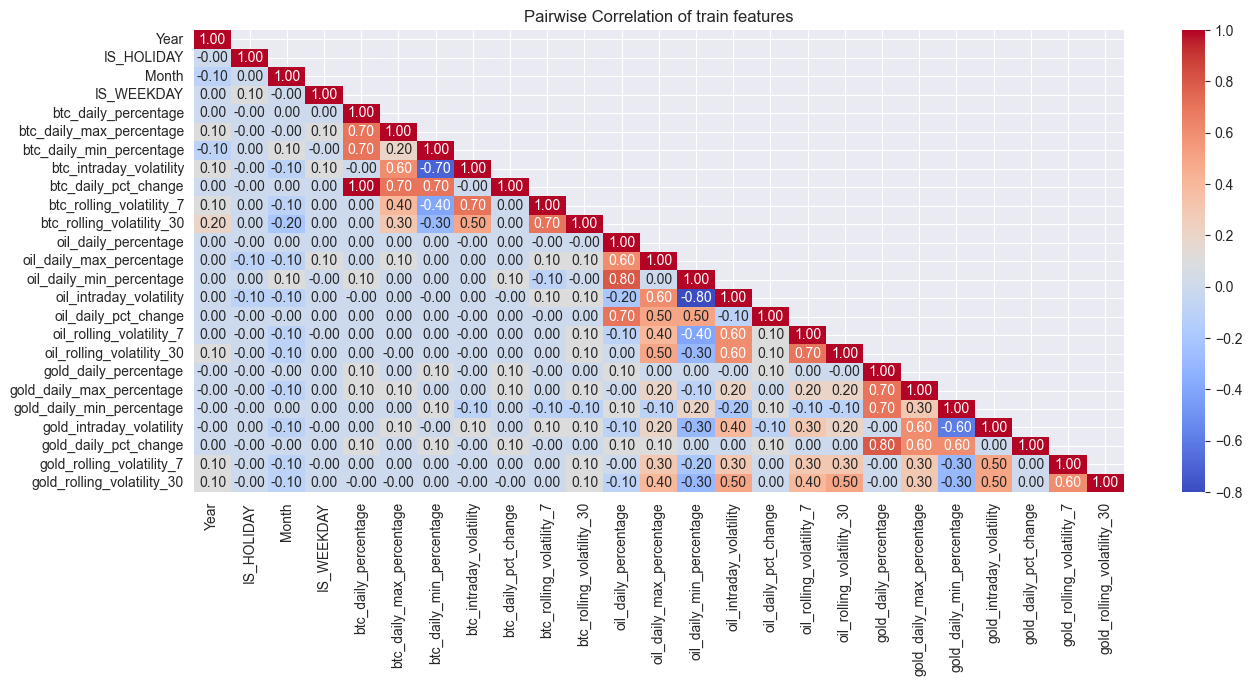

In [156]:
correlation_matrix = X_train.corr().round(1)

# Modify the mask to exclude the diagonal
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# Plot the heatmap with the modified mask to include the diagonal
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Pairwise Correlation of train features")
plt.show()

#### **Check if all features are Normally Distributed**

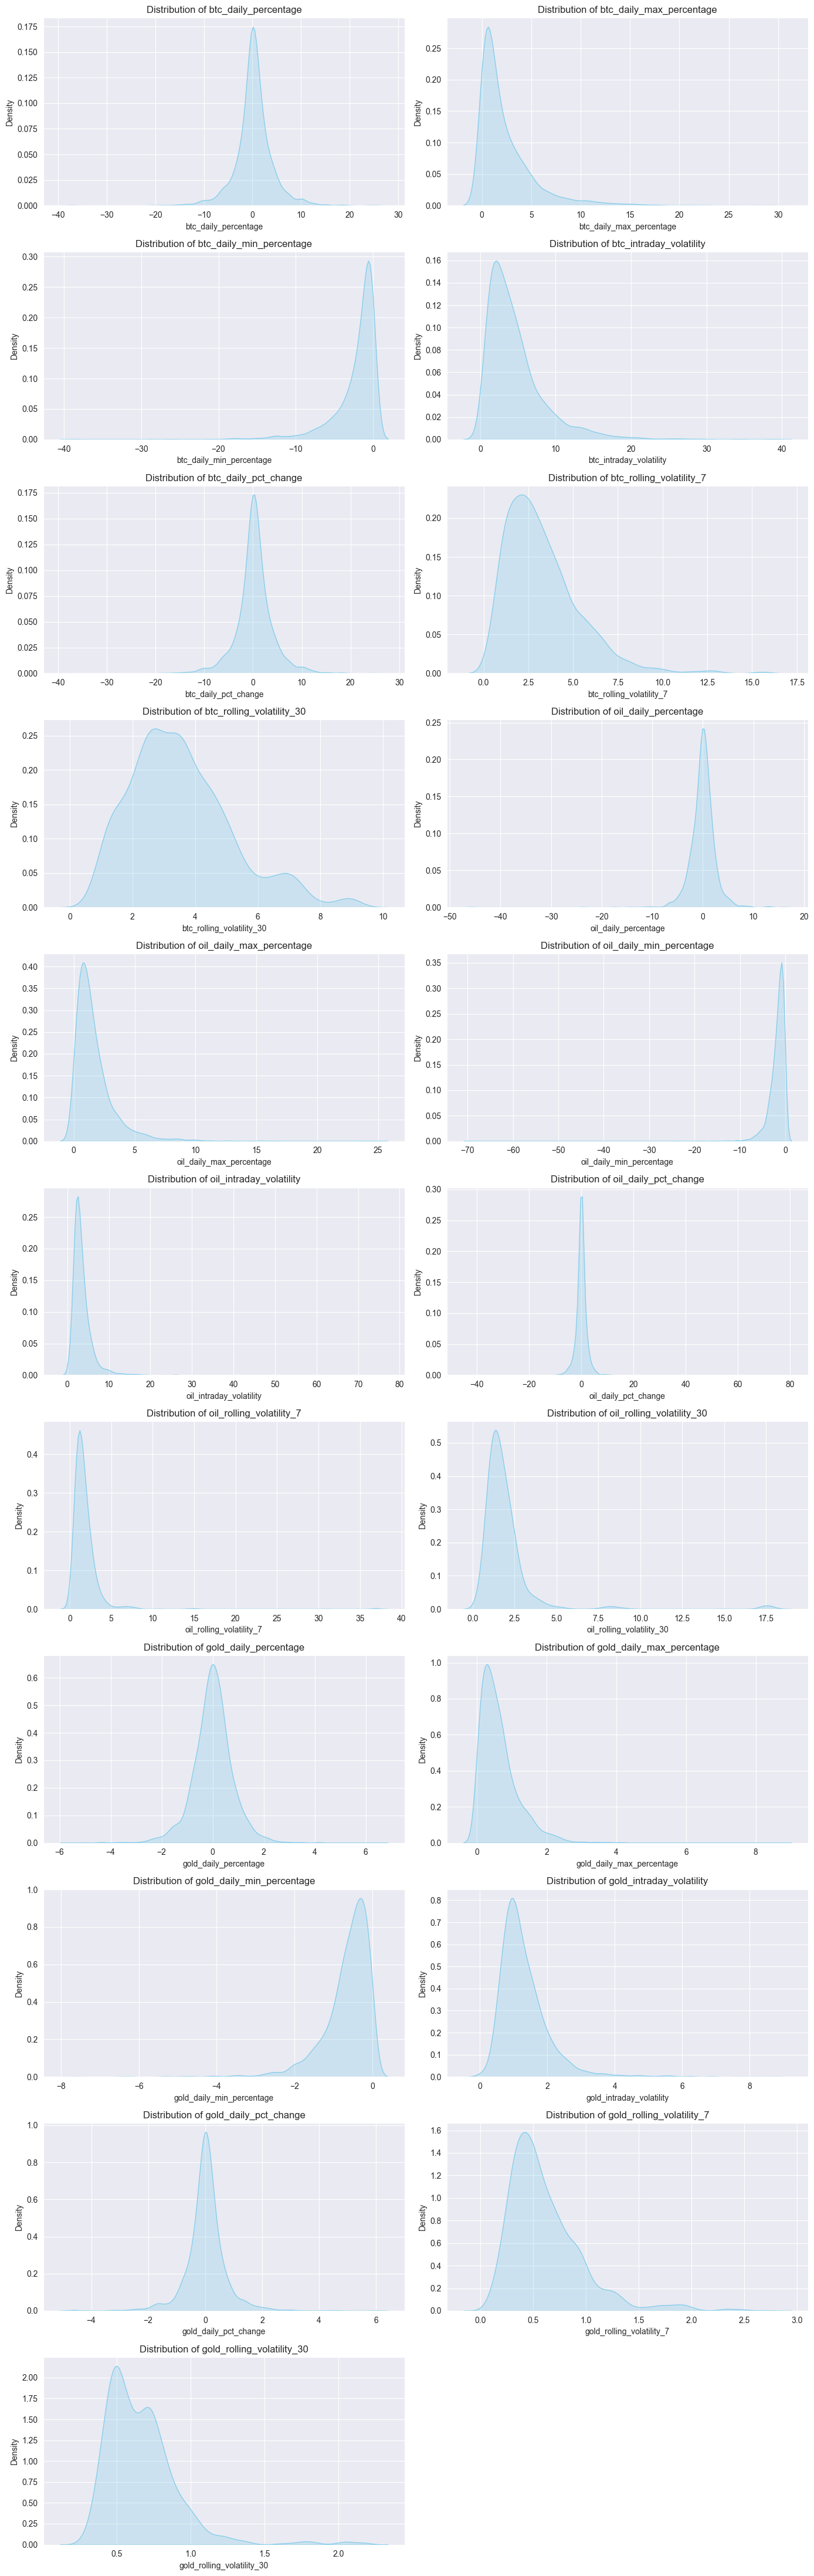

In [157]:
# Columns to exclude from distribution plots
exclude_columns = ['Year', 'IS_HOLIDAY', 'Month', 'IS_WEEKDAY']

# Filter columns to include only relevant ones
columns_to_plot = [col for col in X_train.columns if col not in exclude_columns]

# Set up the grid layout
n_cols = 2  # Number of plots per row
n_rows = math.ceil(len(columns_to_plot) / n_cols)  # Calculate the required rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4))

# Flatten axes for easy iteration (handles cases where n_cols != n_rows)
axes = axes.flatten()

# Plot each column
for i, column in enumerate(columns_to_plot):
    sns.kdeplot(X_train[column], fill=True, alpha=0.3, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')

# Hide any empty subplots
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

#### **Separate Symmetric and skewed variables to apply different transformations**

In [158]:
# Automatically categorize features by skewness
skew_threshold = 0.5  
symmetric_columns = []
skewed_columns = []

for column in X_train.columns:
    skewness = X_train[column].skew()
    if abs(skewness) <= skew_threshold:
        symmetric_columns.append(column)
    else:
        skewed_columns.append(column)

In [159]:
symmetric_columns

['Year',
 'Month',
 'btc_daily_percentage',
 'btc_daily_pct_change',
 'gold_daily_percentage',
 'gold_daily_pct_change']

In [160]:
skewed_columns

['IS_HOLIDAY',
 'IS_WEEKDAY',
 'btc_daily_max_percentage',
 'btc_daily_min_percentage',
 'btc_intraday_volatility',
 'btc_rolling_volatility_7',
 'btc_rolling_volatility_30',
 'oil_daily_percentage',
 'oil_daily_max_percentage',
 'oil_daily_min_percentage',
 'oil_intraday_volatility',
 'oil_daily_pct_change',
 'oil_rolling_volatility_7',
 'oil_rolling_volatility_30',
 'gold_daily_max_percentage',
 'gold_daily_min_percentage',
 'gold_intraday_volatility',
 'gold_rolling_volatility_7',
 'gold_rolling_volatility_30']

In [161]:
# Define separate pipelines for symmetric and skewed columns
symmetric_pipeline = Pipeline(steps=[
    ('mean_imputer', SimpleImputer(strategy='mean')), 
    ('skew_correction', PowerTransformer(method='yeo-johnson')), 
    ('scaler', RobustScaler()) 
])

skewed_pipeline = Pipeline(steps=[
    ('median_imputer', SimpleImputer(strategy='median')),  
    ('skew_correction', PowerTransformer(method='yeo-johnson')),  
    ('scaler', RobustScaler()) 
])


# Integrate the two pipelines into the preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('symmetric_processing', symmetric_pipeline, symmetric_columns),  
    ('skewed_processing', skewed_pipeline, skewed_columns)  
])

In [162]:
preprocessor

ColumnTransformer(transformers=[('symmetric_processing',
                                 Pipeline(steps=[('mean_imputer',
                                                  SimpleImputer()),
                                                 ('skew_correction',
                                                  PowerTransformer()),
                                                 ('scaler', RobustScaler())]),
                                 ['Year', 'Month', 'btc_daily_percentage',
                                  'btc_daily_pct_change',
                                  'gold_daily_percentage',
                                  'gold_daily_pct_change']),
                                ('skewed_processing',
                                 Pipeline(steps=[('median_imputer',
                                                  SimpleImput...
                                  'btc_rolling_volatility_30',
                                  'oil_daily_percentage',
                                  'oil_daily_max_percentage',
                                  'oil_daily_min_percentage',
                                  'oil_intraday_volatility',
                                  'oil_daily_pct_change',
                                  'oil_rolling_volatility_7',
                                  'oil_rolling_volatility_30',
                                  'gold_daily_max_percentage',
                                  'gold_daily_min_percentage',
                                  'gold_intraday_volatility',
                                  'gold_rolling_volatility_7',
                                  'gold_rolling_volatility_30'])])

#### **Encode the y-target**

In [163]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [164]:
y_train.value_counts()

Movement
Negative    884
Positive    852
Stable      821
Name: count, dtype: int64

In [165]:
y_test.value_counts()

Movement
Positive    422
Negative    352
Stable      322
Name: count, dtype: int64

In [166]:
# Get the value counts for the classes
value_counts = y_train.value_counts()

# Create a DataFrame for Plotly
value_counts_df = pd.DataFrame({'Class': value_counts.index, 'Count': value_counts.values})

# Create the bar chart using Plotly
fig = px.bar(value_counts_df, 
             x='Class', 
             y='Count', 
             title='Class Distribution of Train Data', 
             labels={'Class': 'Class', 'Count': 'Number of Instances'}, 
             color='Class',
             text='Count')

fig.show()

### **`Modelling & Evaluation`**

In [167]:
models = [
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('SVC', SVC(random_state=42, probability=True)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)), 
    ('AdaBoost', AdaBoostClassifier(random_state=42)), 
    ('XGBoost', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')), 
    ('K-Nearest Neighbors', KNeighborsClassifier()), 
    ('Naive Bayes', GaussianNB()) 
]


In [168]:
selection = SelectKBest(mutual_info_classif, k='all')

fi_smote_df = pd.DataFrame(columns=['Model_name', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])

all_pipelines = {}

for model_name, classifier in models:

    pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_importance', selection),
    ('classifier', classifier)
    ])

    pipeline.fit(X_train, y_train_encoded)

    all_pipelines[model_name] = pipeline

    smote_y_pred = pipeline.predict(X_test)

    fi_smote_dict = classification_report(y_test_encoded, smote_y_pred, output_dict=True)

    acccuracy = fi_smote_dict['accuracy']
    precision = fi_smote_dict['weighted avg']['precision']
    recall = fi_smote_dict['weighted avg']['recall']
    f1_score = fi_smote_dict['weighted avg']['f1-score']

    fi_smote_df.loc[len(fi_smote_df)] = [model_name, acccuracy, precision, recall, f1_score]


# Sort the DataFrame by 'F1_Score' in descending order
sorted_fi_smote_df = fi_smote_df.sort_values(by='F1_Score', ascending=False)
sorted_fi_smote_df

,Model_name,Accuracy,Precision,Recall,F1_Score
2,Random Forest,0.541058,0.546011,0.541058,0.541208
4,Gradient Boosting,0.539234,0.552970,0.539234,0.540635
1,SVC,0.526460,0.536695,0.526460,0.525945
6,XGBoost,0.524635,0.540179,0.524635,0.523972
5,AdaBoost,0.510036,0.518321,0.510036,0.510543
8,Naive Bayes,0.503650,0.521918,0.503650,0.499734
3,Logistic Regression,0.491788,0.519540,0.491788,0.484483
7,K-Nearest Neighbors,0.468978,0.483910,0.468978,0.468348
0,Decision Tree,0.428832,0.434484,0.428832,0.429296


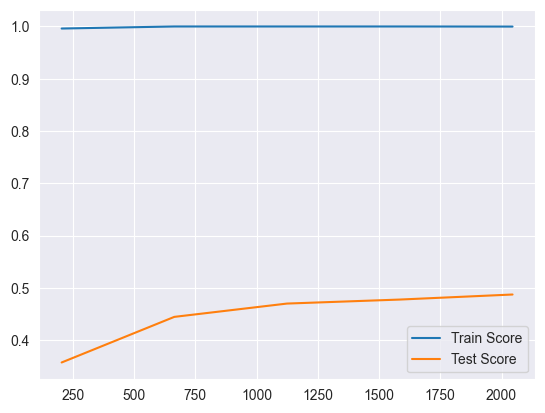

In [169]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    RandomForestClassifier(random_state=42),
    X_train, y_train_encoded, cv=5, scoring='f1_weighted'
)

plt.plot(train_sizes, train_scores.mean(axis=1), label='Train Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Test Score')
plt.legend()
plt.show()


#### **Area Under the Curve**

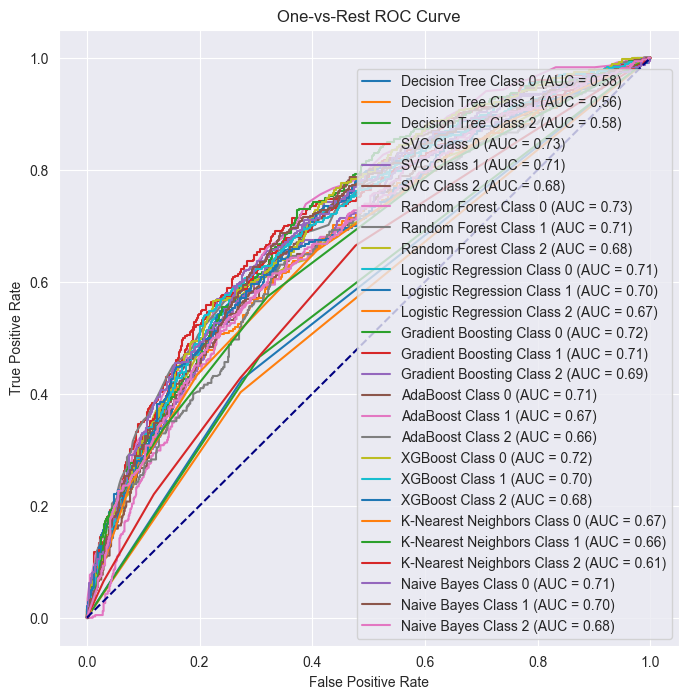

In [170]:
# Binarize the true labels (one column for each class)
classes = np.unique(y_test_encoded)
y_test_binarized = label_binarize(y_test_encoded, classes=classes)

fig, ax = plt.subplots(figsize=(8, 8))
roc_curve_data = {}

for model_name, pipeline in all_pipelines.items():
    # Get predicted probabilities for all classes
    y_scores = pipeline.predict_proba(X_test)

    for i, class_label in enumerate(classes):
        # Compute ROC curve and AUC for each class
        fpr, tpr, threshold = roc_curve(y_test_binarized[:, i], y_scores[:, i])
        roc_auc = auc(fpr, tpr)

        # Store the ROC curve data
        roc_curve_df = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr, 'Threshold': threshold})
        roc_curve_data[f'{model_name}_Class_{class_label}'] = roc_curve_df

        # Plot the ROC curve
        ax.plot(fpr, tpr, label=f'{model_name} Class {class_label} (AUC = {roc_auc:.2f})')

# Plot the random baseline
ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('One-vs-Rest ROC Curve')
ax.legend(loc='lower right')
plt.show()


                  Feature Name     Score
0     btc_daily_max_percentage  0.216767
1    oil_rolling_volatility_30  0.124894
2         btc_daily_percentage  0.087801
3    gold_daily_max_percentage  0.054879
4     gold_intraday_volatility  0.051171
5    gold_daily_min_percentage  0.047366
6      btc_intraday_volatility  0.046821
7   gold_rolling_volatility_30  0.031381
8                         Year  0.030589
9      oil_intraday_volatility  0.028835
10        oil_daily_pct_change  0.024197
11    oil_rolling_volatility_7  0.023503
12   gold_rolling_volatility_7  0.023032
13                  IS_HOLIDAY  0.014673
14    oil_daily_max_percentage  0.014080
15    btc_daily_min_percentage  0.011533
16    btc_rolling_volatility_7  0.011440
17                  IS_WEEKDAY  0.011285
18                       Month  0.005414
19    oil_daily_min_percentage  0.002464
20        btc_daily_pct_change  0.000000
21   btc_rolling_volatility_30  0.000000
22        oil_daily_percentage  0.000000
23       gold_da

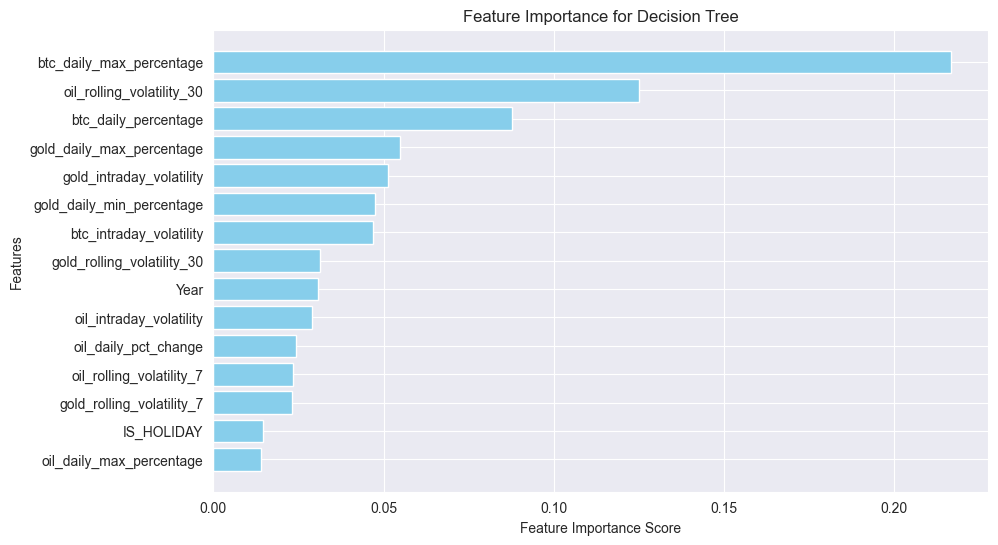

                  Feature Name     Score
0     btc_daily_max_percentage  0.216767
1    oil_rolling_volatility_30  0.124894
2         btc_daily_percentage  0.087801
3    gold_daily_max_percentage  0.054879
4     gold_intraday_volatility  0.051171
5    gold_daily_min_percentage  0.047366
6      btc_intraday_volatility  0.046821
7   gold_rolling_volatility_30  0.031381
8                         Year  0.030589
9      oil_intraday_volatility  0.028835
10        oil_daily_pct_change  0.024197
11    oil_rolling_volatility_7  0.023503
12   gold_rolling_volatility_7  0.023032
13                  IS_HOLIDAY  0.014673
14    oil_daily_max_percentage  0.014080
15    btc_daily_min_percentage  0.011533
16    btc_rolling_volatility_7  0.011440
17                  IS_WEEKDAY  0.011285
18                       Month  0.005414
19    oil_daily_min_percentage  0.002464
20        btc_daily_pct_change  0.000000
21   btc_rolling_volatility_30  0.000000
22        oil_daily_percentage  0.000000
23       gold_da

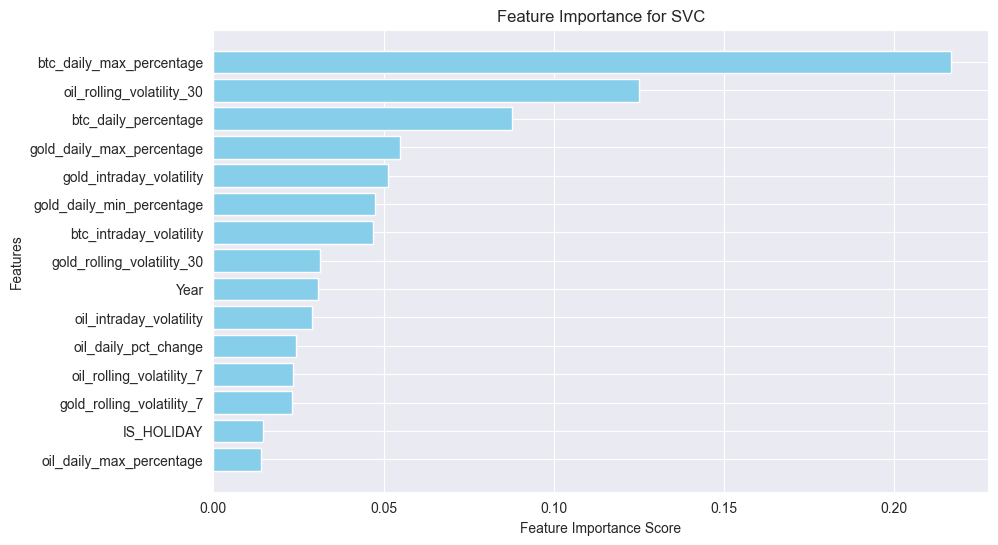

                  Feature Name     Score
0     btc_daily_max_percentage  0.216767
1    oil_rolling_volatility_30  0.124894
2         btc_daily_percentage  0.087801
3    gold_daily_max_percentage  0.054879
4     gold_intraday_volatility  0.051171
5    gold_daily_min_percentage  0.047366
6      btc_intraday_volatility  0.046821
7   gold_rolling_volatility_30  0.031381
8                         Year  0.030589
9      oil_intraday_volatility  0.028835
10        oil_daily_pct_change  0.024197
11    oil_rolling_volatility_7  0.023503
12   gold_rolling_volatility_7  0.023032
13                  IS_HOLIDAY  0.014673
14    oil_daily_max_percentage  0.014080
15    btc_daily_min_percentage  0.011533
16    btc_rolling_volatility_7  0.011440
17                  IS_WEEKDAY  0.011285
18                       Month  0.005414
19    oil_daily_min_percentage  0.002464
20        btc_daily_pct_change  0.000000
21   btc_rolling_volatility_30  0.000000
22        oil_daily_percentage  0.000000
23       gold_da

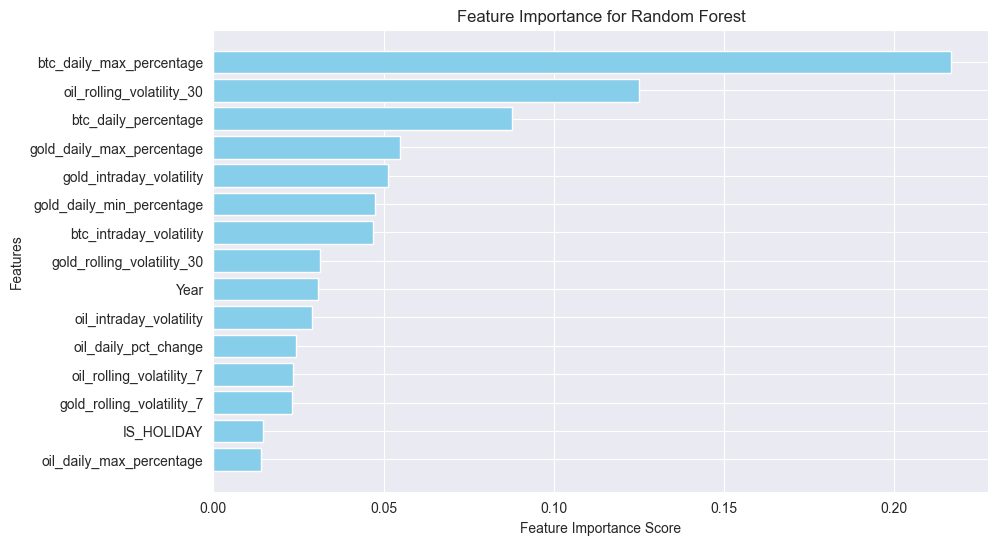

                  Feature Name     Score
0     btc_daily_max_percentage  0.216767
1    oil_rolling_volatility_30  0.124894
2         btc_daily_percentage  0.087801
3    gold_daily_max_percentage  0.054879
4     gold_intraday_volatility  0.051171
5    gold_daily_min_percentage  0.047366
6      btc_intraday_volatility  0.046821
7   gold_rolling_volatility_30  0.031381
8                         Year  0.030589
9      oil_intraday_volatility  0.028835
10        oil_daily_pct_change  0.024197
11    oil_rolling_volatility_7  0.023503
12   gold_rolling_volatility_7  0.023032
13                  IS_HOLIDAY  0.014673
14    oil_daily_max_percentage  0.014080
15    btc_daily_min_percentage  0.011533
16    btc_rolling_volatility_7  0.011440
17                  IS_WEEKDAY  0.011285
18                       Month  0.005414
19    oil_daily_min_percentage  0.002464
20        btc_daily_pct_change  0.000000
21   btc_rolling_volatility_30  0.000000
22        oil_daily_percentage  0.000000
23       gold_da

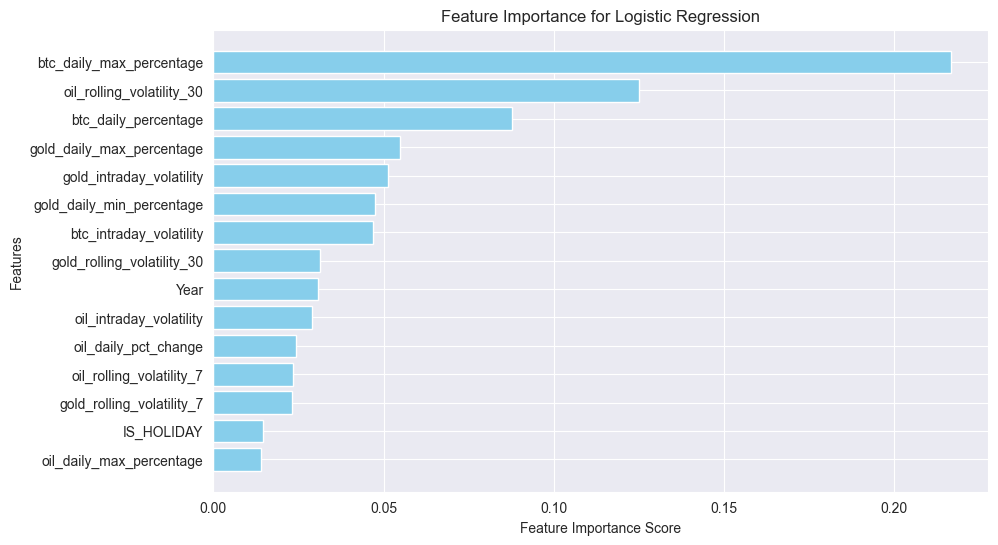

                  Feature Name     Score
0     btc_daily_max_percentage  0.216767
1    oil_rolling_volatility_30  0.124894
2         btc_daily_percentage  0.087801
3    gold_daily_max_percentage  0.054879
4     gold_intraday_volatility  0.051171
5    gold_daily_min_percentage  0.047366
6      btc_intraday_volatility  0.046821
7   gold_rolling_volatility_30  0.031381
8                         Year  0.030589
9      oil_intraday_volatility  0.028835
10        oil_daily_pct_change  0.024197
11    oil_rolling_volatility_7  0.023503
12   gold_rolling_volatility_7  0.023032
13                  IS_HOLIDAY  0.014673
14    oil_daily_max_percentage  0.014080
15    btc_daily_min_percentage  0.011533
16    btc_rolling_volatility_7  0.011440
17                  IS_WEEKDAY  0.011285
18                       Month  0.005414
19    oil_daily_min_percentage  0.002464
20        btc_daily_pct_change  0.000000
21   btc_rolling_volatility_30  0.000000
22        oil_daily_percentage  0.000000
23       gold_da

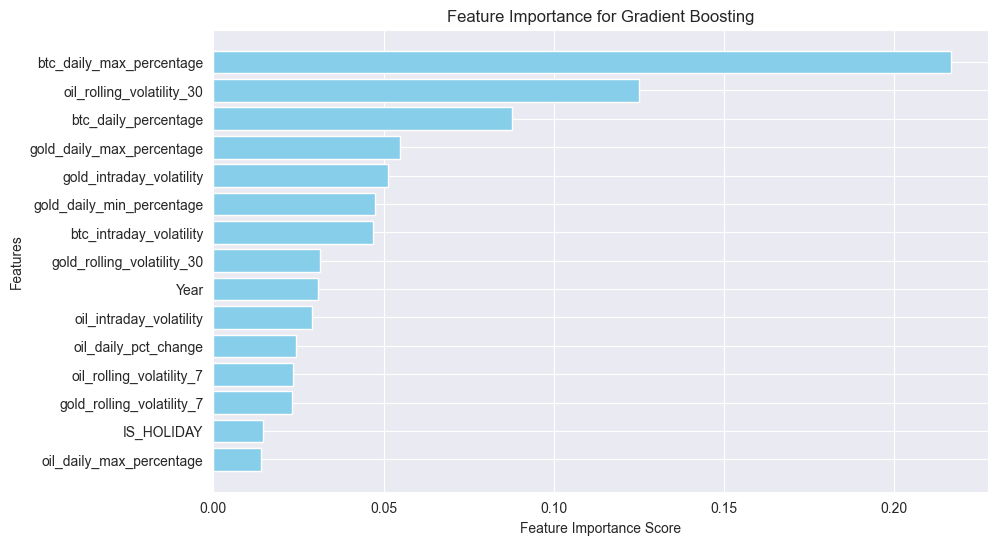

                  Feature Name     Score
0     btc_daily_max_percentage  0.216767
1    oil_rolling_volatility_30  0.124894
2         btc_daily_percentage  0.087801
3    gold_daily_max_percentage  0.054879
4     gold_intraday_volatility  0.051171
5    gold_daily_min_percentage  0.047366
6      btc_intraday_volatility  0.046821
7   gold_rolling_volatility_30  0.031381
8                         Year  0.030589
9      oil_intraday_volatility  0.028835
10        oil_daily_pct_change  0.024197
11    oil_rolling_volatility_7  0.023503
12   gold_rolling_volatility_7  0.023032
13                  IS_HOLIDAY  0.014673
14    oil_daily_max_percentage  0.014080
15    btc_daily_min_percentage  0.011533
16    btc_rolling_volatility_7  0.011440
17                  IS_WEEKDAY  0.011285
18                       Month  0.005414
19    oil_daily_min_percentage  0.002464
20        btc_daily_pct_change  0.000000
21   btc_rolling_volatility_30  0.000000
22        oil_daily_percentage  0.000000
23       gold_da

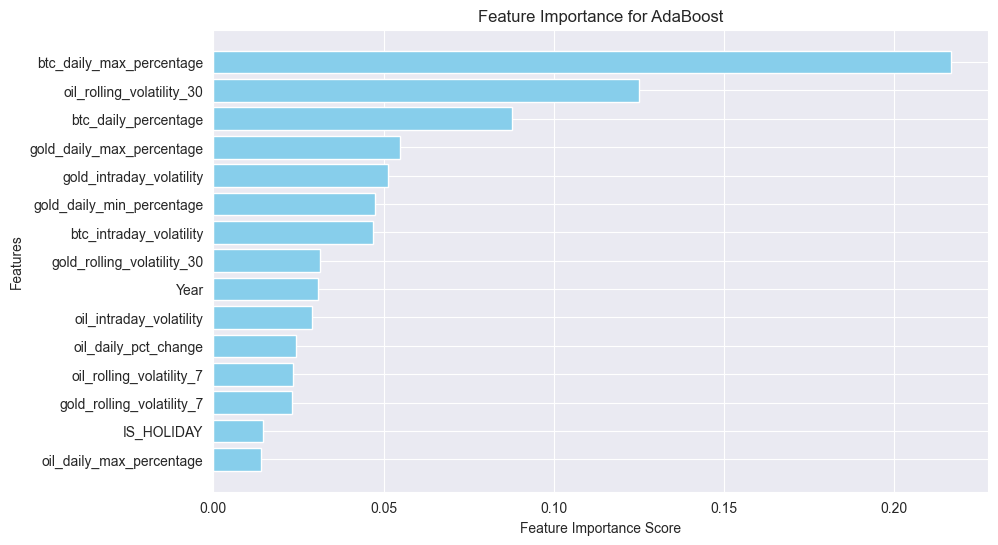

                  Feature Name     Score
0     btc_daily_max_percentage  0.216767
1    oil_rolling_volatility_30  0.124894
2         btc_daily_percentage  0.087801
3    gold_daily_max_percentage  0.054879
4     gold_intraday_volatility  0.051171
5    gold_daily_min_percentage  0.047366
6      btc_intraday_volatility  0.046821
7   gold_rolling_volatility_30  0.031381
8                         Year  0.030589
9      oil_intraday_volatility  0.028835
10        oil_daily_pct_change  0.024197
11    oil_rolling_volatility_7  0.023503
12   gold_rolling_volatility_7  0.023032
13                  IS_HOLIDAY  0.014673
14    oil_daily_max_percentage  0.014080
15    btc_daily_min_percentage  0.011533
16    btc_rolling_volatility_7  0.011440
17                  IS_WEEKDAY  0.011285
18                       Month  0.005414
19    oil_daily_min_percentage  0.002464
20        btc_daily_pct_change  0.000000
21   btc_rolling_volatility_30  0.000000
22        oil_daily_percentage  0.000000
23       gold_da

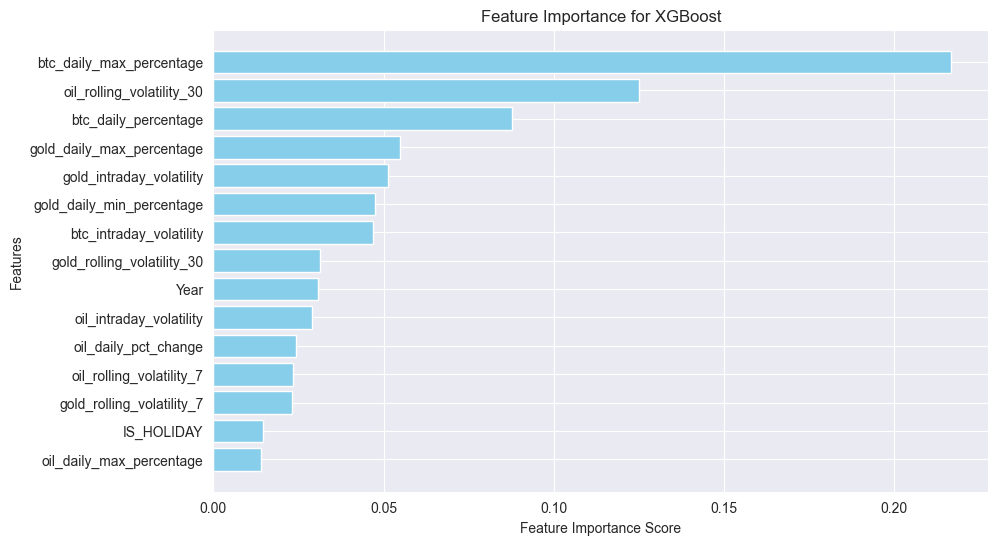

                  Feature Name     Score
0     btc_daily_max_percentage  0.216767
1    oil_rolling_volatility_30  0.124894
2         btc_daily_percentage  0.087801
3    gold_daily_max_percentage  0.054879
4     gold_intraday_volatility  0.051171
5    gold_daily_min_percentage  0.047366
6      btc_intraday_volatility  0.046821
7   gold_rolling_volatility_30  0.031381
8                         Year  0.030589
9      oil_intraday_volatility  0.028835
10        oil_daily_pct_change  0.024197
11    oil_rolling_volatility_7  0.023503
12   gold_rolling_volatility_7  0.023032
13                  IS_HOLIDAY  0.014673
14    oil_daily_max_percentage  0.014080
15    btc_daily_min_percentage  0.011533
16    btc_rolling_volatility_7  0.011440
17                  IS_WEEKDAY  0.011285
18                       Month  0.005414
19    oil_daily_min_percentage  0.002464
20        btc_daily_pct_change  0.000000
21   btc_rolling_volatility_30  0.000000
22        oil_daily_percentage  0.000000
23       gold_da

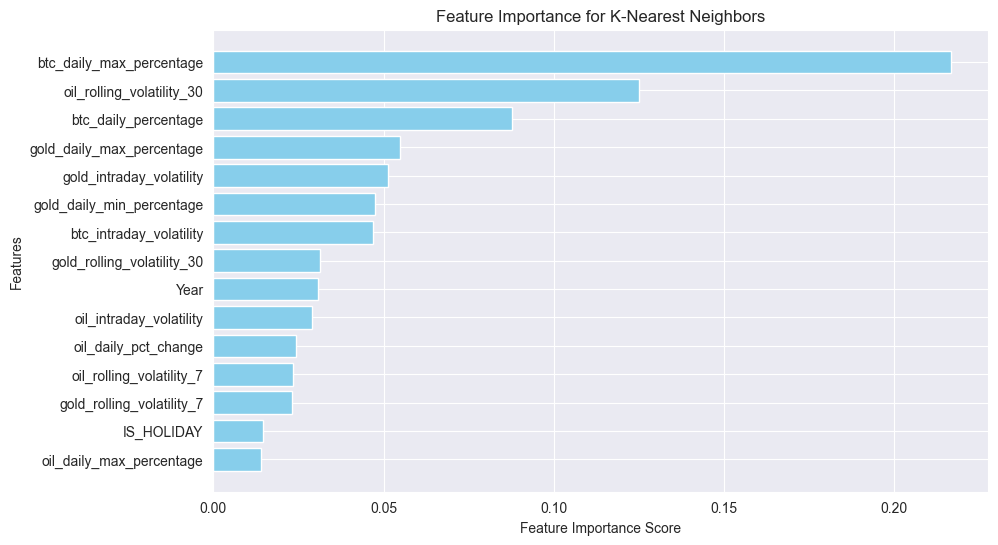

                  Feature Name     Score
0     btc_daily_max_percentage  0.216767
1    oil_rolling_volatility_30  0.124894
2         btc_daily_percentage  0.087801
3    gold_daily_max_percentage  0.054879
4     gold_intraday_volatility  0.051171
5    gold_daily_min_percentage  0.047366
6      btc_intraday_volatility  0.046821
7   gold_rolling_volatility_30  0.031381
8                         Year  0.030589
9      oil_intraday_volatility  0.028835
10        oil_daily_pct_change  0.024197
11    oil_rolling_volatility_7  0.023503
12   gold_rolling_volatility_7  0.023032
13                  IS_HOLIDAY  0.014673
14    oil_daily_max_percentage  0.014080
15    btc_daily_min_percentage  0.011533
16    btc_rolling_volatility_7  0.011440
17                  IS_WEEKDAY  0.011285
18                       Month  0.005414
19    oil_daily_min_percentage  0.002464
20        btc_daily_pct_change  0.000000
21   btc_rolling_volatility_30  0.000000
22        oil_daily_percentage  0.000000
23       gold_da

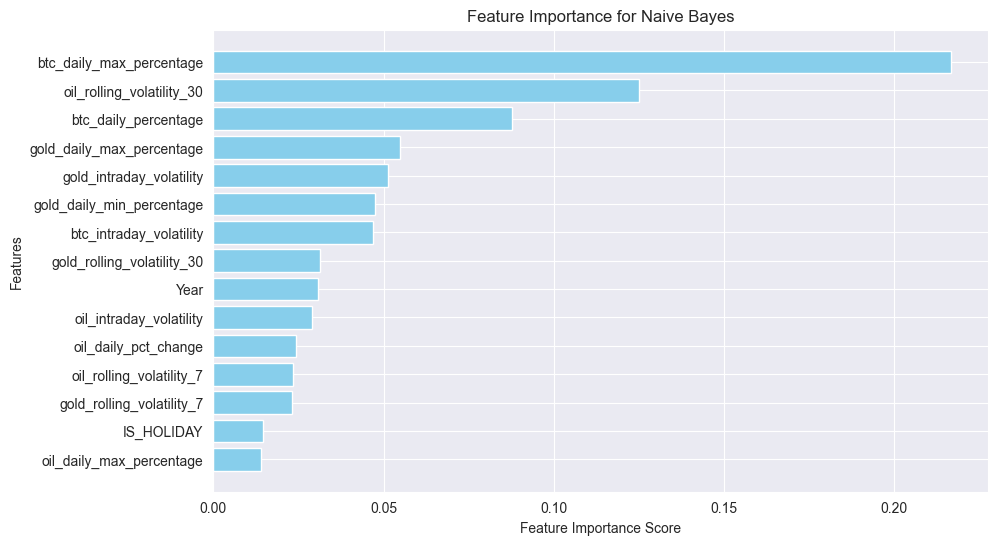

In [ ]:
# Loop through each pipeline stored in the all_pipelines dictionary
for model_name, pipeline in all_pipelines.items():
    # Get the SelectKBest instance from the pipeline
    selection = pipeline.named_steps['feature_importance']
    
    # Extract feature scores and names
    feature_scores = selection.scores_
    feature_names = X_train.columns  # Ensure X_train is a DataFrame with column names

    # Combine names and scores, then sort by score
    feature_importance = sorted(zip(feature_names, feature_scores), key=lambda x: x[1], reverse=True)
    features, scores = zip(*feature_importance)
    
    df = pd.DataFrame(feature_importance, columns=['Feature Name', 'Score'])
    print(df)
    # Plot the feature importance for this model
    plt.figure(figsize=(10, 6))
    plt.barh(features[:15], scores[:15], color='skyblue')  
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title(f'Feature Importance for {model_name}')
    plt.gca().invert_yaxis()  
    plt.show()


In [ ]:
all_pipelines['Logistic Regression']

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('symmetric_processing',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('skew_correction',
                                                                   PowerTransformer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Year', 'Month',
                                                   'btc_daily_percentage',
                                                   'btc_daily_pct_change',
                                                   'gold_daily_percentage',
                                                   'gold_daily_pct_change']),
                                                 ('skewed_processing',
                                                  Pipeline(step...
                                                   'oil_rolling_volatility_7',
                                                   'oil_rolling_volatility_30',
                                                   'gold_daily_max_percentage',
                                                   'gold_daily_min_percentage',
                                                   'gold_intraday_volatility',
                                                   'gold_rolling_volatility_7',
                                                   'gold_rolling_volatility_30'])])),
                ('feature_importance',
                 SelectKBest(k='all',
                             score_func=<function mutual_info_classif at 0x0000023EA3B1FD80>)),
                ('classifier', LogisticRegression(random_state=42))])